# RTS Data Analyst take-home assignment

🔍 Understand the Objective
You need to:
- Recommend volume per content (i.e., how much to produce) for each of 5 themes: info, sport, musique, societe, humour
- Help business understand the function each theme serves:
acquisition, retention, or loyalty
- Communicate this with clear insights and visuals

# 📌 1. Import Libraries

In [1]:
import gc
gc.collect()

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')

# 📂 2. Load Raw Data

## 2.1. Mesures_contenu_volume_audio_à_commander.csv

In [2]:
# Load the CSV file
path_volume = "../data/Mesures_contenu_volume_audio_à_commander.csv"
metrics_df = pd.read_csv(path_volume, sep=';', encoding='utf-8')

# Show first few rows of each for context
metrics_df

,Segment ID,Segment,Show ID,Show,Publication Date,App/Site Name,Device Class,Segment Length,Media Views,Avg Play Duration,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Total Play Duration
0,14897825,Le Suisse Nemo triomphe à lEurovision avec sa ...,2031524,Le Journal horaire,12.05.2024,rts.ch,Smartphone,1234,20762,00:05:19,18877,"84,56%",9770,13135,3428,5181,94:50:23
1,15102359,Une trombe sest formée au-dessus du lac Léman,2031524,Le Journal horaire,18.08.2024,rts.ch,Smartphone,586,14703,00:03:27,13381,"53,30%",9889,11505,6458,6798,108:13:53
2,14572281,De Genève à Zurich: un périple sanglant en Hel...,14546712,Crimes suisses,05.01.2024,rts-app-play,Smartphone,3490,7327,00:24:41,4124,"2,49%",1527,1928,6594,602,2601:23:11
3,14689374,Prise dotages dans un train près dYverdon: les...,8849020,La Matinale,09.02.2024,rts.ch,Smartphone,1500,7560,00:06:25,7934,"71,32%",4370,4993,2671,2729,151:43:36
4,359fc205-7470-38e0-b393-3b4a2e429508,Pourquoi les couples se séparent,6067786,Tribu,07.04.2025,rts.ch,Smartphone,1956,7201,00:08:34,7147,"43,80%",6741,3901,4808,4016,851:19:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277581,8d3ad86d-97e1-372b-bc60-8e0f58643b37,"Face au défi climatique, Neuchâtel fait un app...",1423859,Le 12h30,12.05.2025,rts-app-sport,Smartphone,564,524,00:01:01,90,"0,00%",103,140,23,726,00:04:16
277582,96015a33-f517-3cf8-bcda-c9658dd6c844,En Douceur,14570123,En Douceur,12.05.2025,rts.ch,Smartphone,4677,451,00:04:25,772,"103,00%",141,802,695,687,00:04:11
277583,0267bc07-2c73-327c-9f5b-f692289ed9d2,Le Suisse mort en Ukraine était un Lausannois ...,1784426,Forum,28.03.2025,rts-app-sport,Smartphone,814,438,00:05:24,989,"0,00%",476,772,859,92,00:00:12
277584,41568641-62b4-3596-99ce-3b8bf4d09ad8,Helveticus,12027724,Léchappée,28.03.2025,rts.ch,Smartphone,1150,512,00:05:02,289,"103,00%",1222,1055,82,889,00:00:14


In [3]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277586 entries, 0 to 277585
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Segment ID           277586 non-null  object
 1   Segment              277586 non-null  object
 2   Show ID              277467 non-null  object
 3   Show                 277467 non-null  object
 4   Publication Date     277467 non-null  object
 5   App/Site Name        277467 non-null  object
 6   Device Class         277467 non-null  object
 7   Segment Length       277586 non-null  int64 
 8   Media Views          277586 non-null  int64 
 9   Avg Play Duration    277586 non-null  object
 10  Visitors             277586 non-null  int64 
 11  New Visit Rate %     277586 non-null  object
 12  Entries              277586 non-null  int64 
 13  Exits                277586 non-null  int64 
 14  Returning Visits     277586 non-null  int64 
 15  Bounces              277586 non-nu

In [4]:
metrics_df.describe()

,Segment Length,Media Views,Visitors,Entries,Exits,Returning Visits,Bounces
count,277586.000000,277586.000000,277586.000000,277586.00000,277586.000000,277586.000000,277586.000000
mean,2266.756205,328.131336,667.504734,630.95284,639.351001,661.112099,624.488497
std,2800.624729,215.137803,375.419407,361.20359,362.775949,373.208065,358.033180
min,6.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,783.000000,178.000000,353.000000,321.00000,328.000000,346.000000,316.000000
50%,1310.000000,319.000000,666.000000,632.00000,639.000000,659.000000,623.000000
75%,2131.000000,457.000000,976.000000,941.00000,949.000000,969.000000,934.000000
max,22957.000000,20762.000000,18877.000000,9889.00000,13135.000000,6594.000000,6798.000000


In [5]:
metrics_df.isnull().sum()

Segment ID               0
Segment                  0
Show ID                119
Show                   119
Publication Date       119
App/Site Name          119
Device Class           119
Segment Length           0
Media Views              0
Avg Play Duration        0
Visitors                 0
New Visit Rate %         0
Entries                  0
Exits                    0
Returning Visits         0
Bounces                  0
Total Play Duration      0
dtype: int64

## 2.2. Correspondance_show_segment_tag.csv

In [6]:
# Load the CSV file
path_tags = "../data/Correspondance_show_segment_tag.csv"
tags_df = pd.read_csv(path_tags, sep=';', encoding='utf-8')

# Show rows for context
tags_df

,Segment ID,Show,Show ID,Assigned Tags
0,14897825,Le Journal horaire,2031524,-
1,15102359,Le Journal horaire,2031524,-
2,15112045,Crimes suisses,14546712,-
3,14689374,La Matinale,8849020,-
4,15126915,Vertigo,4197907,-
...,...,...,...,...
107797,14818255,Forum,1784426,media_radio:media_radio_media_radio:info_rts_i...
107798,14851148,Forum,1784426,media_radio:la-1ere_rts_info:rts_info_media_tv...
107799,15228940,Forum,1784426,media_radio:media_radio_rts_info:monde_rts_inf...
107800,14845847,Forum,1784426,media_radio:media_radio_media_radio:info_rts_i...


In [7]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107802 entries, 0 to 107801
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Segment ID     107802 non-null  object
 1   Show           107802 non-null  object
 2   Show ID        107802 non-null  object
 3   Assigned Tags  107802 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [8]:
tags_df.describe()

,Segment ID,Show,Show ID,Assigned Tags
count,107802,107802,107802,107802
unique,80731,491,470,2360
top,15447445,Le Journal horaire,2031524,-
freq,9,18894,18971,59253


In [9]:
tags_df.isnull().sum()

Segment ID       0
Show             0
Show ID          0
Assigned Tags    0
dtype: int64

# 🧼 3. Clean and Prepare Metrics

#### 3.1. Cleaning titles

In [10]:
# remove trailing spaces from column names
metrics_df.columns = metrics_df.columns.str.rstrip()
# remove extra characters
metrics_df.columns = metrics_df.columns.str.strip().str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Renaming 'Segment Length' to 'Episode Length (s)' as per data description
metrics_df = metrics_df.rename(columns={'Segment Length': 'Episode Length (s)'})

#### 3.2. Checking duplicated rows

In [11]:
# Count duplicated rows (full row duplicates)
duplicate_rows = metrics_df.duplicated()
print(duplicate_rows.sum())

0


#### 3.3. Missing values

In [12]:
# Identify rows
## impact on 'Show ID','Show','Publication Date','App/Site Name', 'Device Class'
missing_rows_1 = metrics_df[metrics_df['Show ID'].isnull()]
missing_rows_2 = metrics_df[metrics_df['Publication Date'].isnull()]
missing_rows_3 = metrics_df[metrics_df['App/Site Name'].isnull()]
missing_rows_4 = metrics_df[metrics_df['Device Class'].isnull()]

## Checking if the missing rows are the same
missing_rows_dfs = [missing_rows_1, missing_rows_2, missing_rows_3, missing_rows_4]
for i, missing_rows in enumerate(missing_rows_dfs):
    i +=1
    missing_count = len(missing_rows)
    total_count = len(metrics_df)
    missing_ratio = missing_count / total_count
    print(f"missing_rows_{i}: {missing_count}, Total rows: {total_count}, Missing ratio: {missing_ratio:.2%}")

missing_rows_1: 119, Total rows: 277586, Missing ratio: 0.04%
missing_rows_2: 119, Total rows: 277586, Missing ratio: 0.04%
missing_rows_3: 119, Total rows: 277586, Missing ratio: 0.04%
missing_rows_4: 119, Total rows: 277586, Missing ratio: 0.04%


In [13]:
# To see if the exact same rows are missing *only* when all these columns are null
## we will check for the intersection of the null masks: "Are these rows null IN ALL specified columns simultaneously?"
all_specified_cols_null_mask = (
    metrics_df['Show ID'].isnull() &
    metrics_df['Publication Date'].isnull() &
    metrics_df['App/Site Name'].isnull() &
    metrics_df['Device Class'].isnull()
)
rows_where_all_specified_are_missing = metrics_df[all_specified_cols_null_mask]


## Then we compare this combined result to our individual missing_rows_X DataFrames
for i, missing_rows in enumerate(missing_rows_dfs):
    i += 1
    print(f"Is missing_rows_{i} identical to rows where ALL specified columns are missing?",
          missing_rows.equals(rows_where_all_specified_are_missing))

Is missing_rows_1 identical to rows where ALL specified columns are missing? True
Is missing_rows_2 identical to rows where ALL specified columns are missing? True
Is missing_rows_3 identical to rows where ALL specified columns are missing? True
Is missing_rows_4 identical to rows where ALL specified columns are missing? True


Regarding the file "Mesures_contenu_volume_audio_à_commander.csv", I have found that 0.04% (119 rows) of the data have missing values on the exact same rows. Moreover, after further investigation, it was also found that these rows containing missing values also have wrong formatting/value in their numerical inputs and wrong titles. Consequently, I will remove the rows containing missing values instead of placig a placeholder

In [14]:
# drop the rows containing empty values in 'Show ID', 'Publication Date', 'App/Site Name', 'Device Class'
metrics_df = metrics_df.dropna(subset=['Show ID', 'Publication Date', 'App/Site Name', 'Device Class']).copy()
print(f"Remaining entries after drop: {metrics_df.shape[0]}")

Remaining entries after drop: 277467


#### 3.4. Data Consistency Checks

In [15]:
metrics_df.columns

Index(['Segment ID', 'Segment', 'Show ID', 'Show', 'Publication Date',
       'App/Site Name', 'Device Class', 'Episode Length (s)', 'Media Views',
       'Avg Play Duration', 'Visitors', 'New Visit Rate %', 'Entries', 'Exits',
       'Returning Visits', 'Bounces', 'Total Play Duration'],
      dtype='object')

- "New Visit Rate %" column

In [16]:
# Noticed that many values were formatted with a coma and a '%' sign

## Converting the column to string
metrics_df["New Visit Rate %"] = metrics_df["New Visit Rate %"].astype(str)

## Remove the '%' character and replace ',' with '.' for decimal conversion
metrics_df["New Visit Rate %"] = metrics_df["New Visit Rate %"] \
                                 .str.replace('%', '', regex=False) \
                                 .str.replace(',', '.', regex=False)

- "Publication Date" column

In [17]:
# Date standardization based on "DD.MM.YYYY"
metrics_df['Publication Date'] = pd.to_datetime(metrics_df['Publication Date'], format='%d.%m.%Y', errors='coerce')
# metrics_df['Publication Date']

- Converting time strings to seconds

In [18]:
# Function to convert hh:mm:ss to total seconds
def duration_to_seconds(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h * 3600 + m * 60 + s
    except:
        return None  # Handles invalid formats

# Apply conversion to 'Avg Play Duration'
metrics_df['Avg Play Duration (s)'] = metrics_df['Avg Play Duration'].apply(duration_to_seconds)
# metrics_df['Avg Play Duration (s)']

# Apply conversion to 'Total Play Duration'
metrics_df['Total Play Duration (s)'] = metrics_df['Total Play Duration'].apply(duration_to_seconds)
# metrics_df['Total Play Duration (s)']

- Converting numerical values

In [19]:
# Numeric columns check
numeric_columns = ['Episode Length (s)', 'Media Views', 'Visitors', 'New Visit Rate %', 
                   'Entries', 'Exits', 'Returning Visits', 'Bounces',
                   'Avg Play Duration (s)', 'Total Play Duration (s)']
# Ensure columns are converted to float explicitly
metrics_df[numeric_columns] = metrics_df[numeric_columns].apply(lambda col: pd.to_numeric(col, errors='coerce')).astype(float)

# Check for numeric conversion issues
print("Numeric conversion check:")
print(metrics_df[numeric_columns].isnull().sum())

Numeric conversion check:
Episode Length (s)         0
Media Views                0
Visitors                   0
New Visit Rate %           0
Entries                    0
Exits                      0
Returning Visits           0
Bounces                    0
Avg Play Duration (s)      0
Total Play Duration (s)    0
dtype: int64


- Converting categorical values

In [20]:
# Convert selected columns to categorical type
categorical_columns = ['Segment ID', 'Segment', 'Show ID', 'Show', 'App/Site Name', 'Device Class']
metrics_df[categorical_columns] = metrics_df[categorical_columns].astype('category')

In [21]:
metrics_df

,Segment ID,Segment,Show ID,Show,Publication Date,App/Site Name,Device Class,Episode Length (s),Media Views,Avg Play Duration,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Total Play Duration,Avg Play Duration (s),Total Play Duration (s)
0,14897825,Le Suisse Nemo triomphe à lEurovision avec sa ...,2031524,Le Journal horaire,2024-05-12,rts.ch,Smartphone,1234.0,20762.0,00:05:19,18877.0,84.56,9770.0,13135.0,3428.0,5181.0,94:50:23,319.0,341423.0
1,15102359,Une trombe sest formée au-dessus du lac Léman,2031524,Le Journal horaire,2024-08-18,rts.ch,Smartphone,586.0,14703.0,00:03:27,13381.0,53.30,9889.0,11505.0,6458.0,6798.0,108:13:53,207.0,389633.0
2,14572281,De Genève à Zurich: un périple sanglant en Hel...,14546712,Crimes suisses,2024-01-05,rts-app-play,Smartphone,3490.0,7327.0,00:24:41,4124.0,2.49,1527.0,1928.0,6594.0,602.0,2601:23:11,1481.0,9364991.0
3,14689374,Prise dotages dans un train près dYverdon: les...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1500.0,7560.0,00:06:25,7934.0,71.32,4370.0,4993.0,2671.0,2729.0,151:43:36,385.0,546216.0
4,359fc205-7470-38e0-b393-3b4a2e429508,Pourquoi les couples se séparent,6067786,Tribu,2025-04-07,rts.ch,Smartphone,1956.0,7201.0,00:08:34,7147.0,43.80,6741.0,3901.0,4808.0,4016.0,851:19:51,514.0,3064791.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277581,8d3ad86d-97e1-372b-bc60-8e0f58643b37,"Face au défi climatique, Neuchâtel fait un app...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,564.0,524.0,00:01:01,90.0,0.00,103.0,140.0,23.0,726.0,00:04:16,61.0,256.0
277582,96015a33-f517-3cf8-bcda-c9658dd6c844,En Douceur,14570123,En Douceur,2025-05-12,rts.ch,Smartphone,4677.0,451.0,00:04:25,772.0,103.00,141.0,802.0,695.0,687.0,00:04:11,265.0,251.0
277583,0267bc07-2c73-327c-9f5b-f692289ed9d2,Le Suisse mort en Ukraine était un Lausannois ...,1784426,Forum,2025-03-28,rts-app-sport,Smartphone,814.0,438.0,00:05:24,989.0,0.00,476.0,772.0,859.0,92.0,00:00:12,324.0,12.0
277584,41568641-62b4-3596-99ce-3b8bf4d09ad8,Helveticus,12027724,Léchappée,2025-03-28,rts.ch,Smartphone,1150.0,512.0,00:05:02,289.0,103.00,1222.0,1055.0,82.0,889.0,00:00:14,302.0,14.0


In [22]:
# Dropping the column "Avg Play Duration" & "Total Play Duration" 
# as we have their values in seconds in "Avg Play Duration (s)" & "Total Play Duration (s)"
metrics_df.drop(columns=['Avg Play Duration', 'Total Play Duration'], inplace=True)

In [23]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277467 entries, 0 to 277585
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Segment ID               277467 non-null  category      
 1   Segment                  277467 non-null  category      
 2   Show ID                  277467 non-null  category      
 3   Show                     277467 non-null  category      
 4   Publication Date         277467 non-null  datetime64[ns]
 5   App/Site Name            277467 non-null  category      
 6   Device Class             277467 non-null  category      
 7   Episode Length (s)       277467 non-null  float64       
 8   Media Views              277467 non-null  float64       
 9   Visitors                 277467 non-null  float64       
 10  New Visit Rate %         277467 non-null  float64       
 11  Entries                  277467 non-null  float64       
 12  Exits                

In [24]:
# Count duplicated rows (full row duplicates)
duplicate_rows = metrics_df.duplicated()
print(duplicate_rows.sum())

0


#### 3.5 Checking outliers

In [25]:
# checking the statistics of the numerical values
metrics_df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Episode Length (s),277467.0,2267.397867,2801.039530,7.0,783.0,1311.00,2132.0,22957.0
Media Views,277467.0,328.154267,215.157239,1.0,178.0,319.00,457.0,20762.0
Visitors,277467.0,667.512468,375.418518,1.0,353.0,666.00,976.0,18877.0
New Visit Rate %,277467.0,27.946340,31.020570,0.0,0.0,16.67,51.0,103.0
Entries,277467.0,630.950481,361.205199,0.0,321.0,632.00,941.0,9889.0
Exits,277467.0,639.369049,362.771866,0.0,329.0,639.00,949.0,13135.0
Returning Visits,277467.0,661.136132,373.207444,0.0,346.0,659.00,969.0,6594.0
Bounces,277467.0,624.508522,358.022316,0.0,316.0,623.00,934.0,6798.0
Avg Play Duration (s),277467.0,574.925688,700.892184,0.0,223.0,352.00,574.0,39130.0
Total Play Duration (s),277467.0,30784.408582,151058.173946,0.0,954.0,3659.00,13957.5,9925784.0


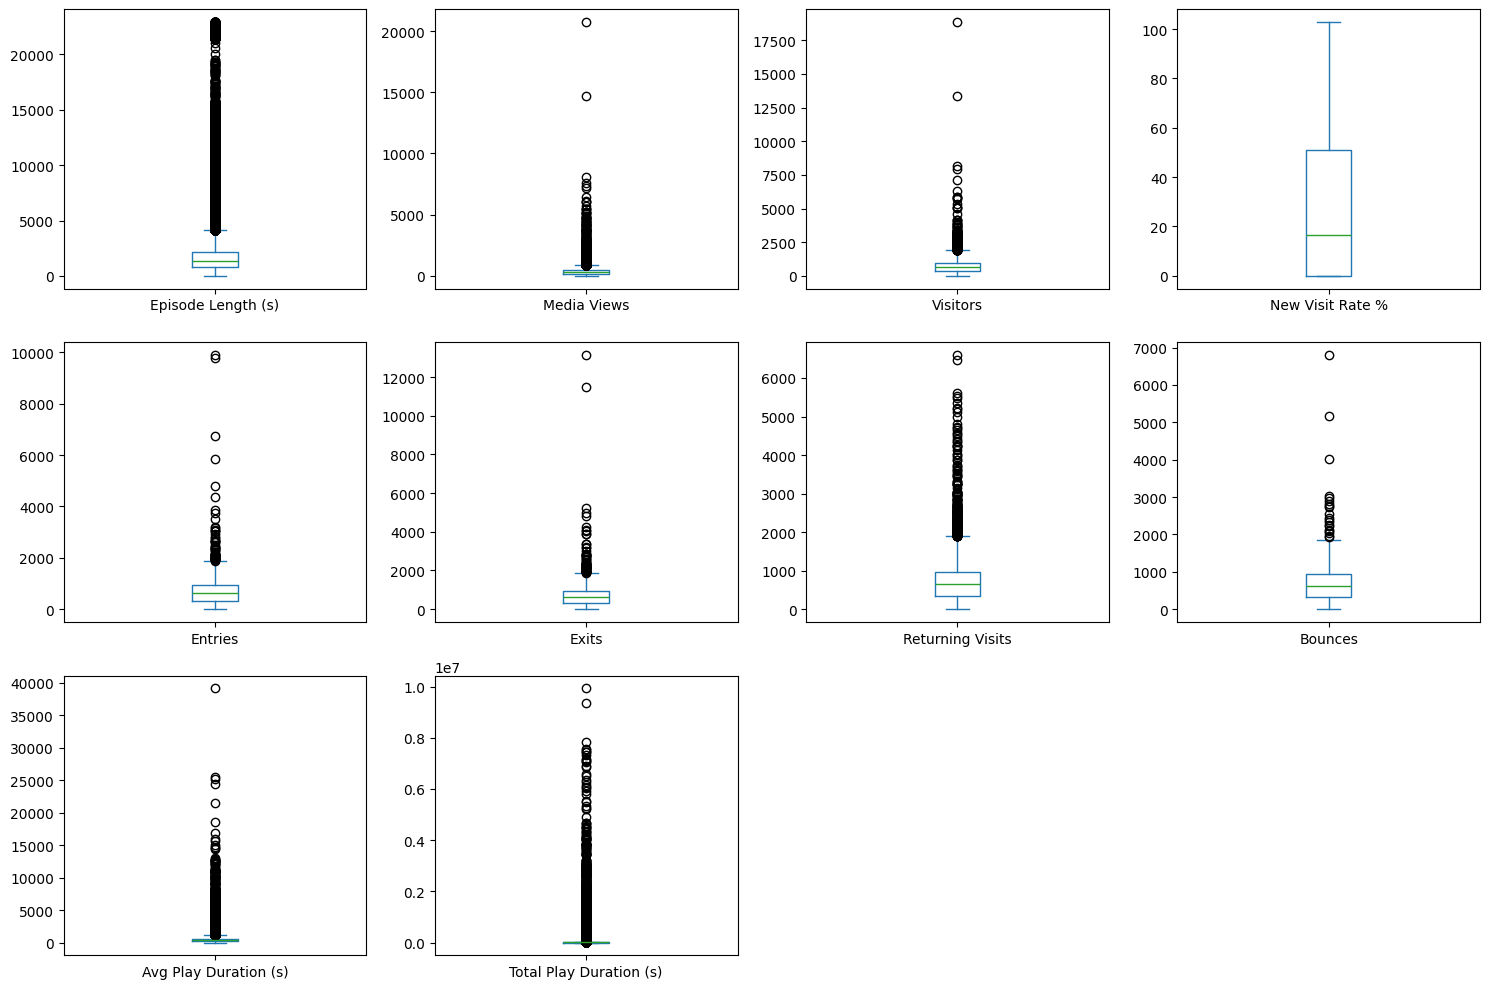

In [26]:
# checking the distribution
metrics_df[numeric_columns].plot(kind='box', subplots=True, layout=(3,4), figsize=(15,10), sharex=False)
plt.tight_layout()
plt.show()

In [27]:
# statistical check: Z-Score Method

## Z-scores for numeric columns
z_scores = metrics_df[numeric_columns].apply(zscore)
outlier_flags = (z_scores.abs() > 3)  # mark outliers (threshold=3 std deviations)

## Check which columns have many outliers
outlier_counts = outlier_flags.sum()
print(outlier_counts)


Episode Length (s)         6935
Media Views                2425
Visitors                    425
New Visit Rate %              0
Entries                      71
Exits                       102
Returning Visits            595
Bounces                      29
Avg Play Duration (s)      5802
Total Play Duration (s)    3021
dtype: int64


In [28]:
# Cap at 99th Percentile
## to reduce outlier impact
for col in numeric_columns:
    cap = metrics_df[col].quantile(0.99)
    metrics_df[col] = metrics_df[col].clip(upper=cap)

# 🧼 4. Clean and Prepare Tags

#### 4.1 Cleaning titles

In [29]:
# Clean column names (e.g., remove invisible characters)
tags_df.columns = tags_df.columns.str.strip().str.replace(r'[^\x00-\x7F]+', '', regex=True)

#### 4.2. Cleaning 'Assigned Tags'

In [30]:
# Replace '-' with None
tags_df['Assigned Tags'] = tags_df['Assigned Tags'].replace('-', None)

# Drop rows where 'Assigned Tags' is None or effectively empty after stripping whitespace
tags_df = tags_df[tags_df['Assigned Tags'].notna() & (tags_df['Assigned Tags'].astype(str).str.strip() != '')]

In [31]:
# Define the five exact valid tags
valid_tags = {
    'media_radio:societe',
    'media_radio:humour',
    'media_radio:info',
    'media_radio:musique',
    'media_radio:sport'
}

In [32]:
# Function to check if each valid tag is present in the full string
def match_valid_tags_in_string(tag_string, valid_tags):
    tag_string = str(tag_string).lower()
    return [tag for tag in valid_tags if tag in tag_string]

In [33]:
# Apply the matching function
tags_df['cleaned_themes'] = tags_df['Assigned Tags'].apply(lambda x: match_valid_tags_in_string(x, valid_tags))
tags_df['Primary Theme'] = tags_df['cleaned_themes'].apply(lambda tags: tags[0] if tags else None)

We noticed that there are 10 shows that contain multi themes:

    3ème mi-temps
    Dis, pourquoi?
    Émission spéciale
    Footaises
    La Matinale
    Le 12h30
    Le grand soir
    Les beaux parleurs
    Sport-Première
    The Jam

In this particular case, we are sticking to the assumption of primary_theme = first theme.
Otherwise we could explode to multi-theme rows, but shows could be repeated among categories.

#### 4.3 Dropping null values in 'Primary Theme'

In [34]:
# Drop all the empty 'Primary Theme' as we could not retrieve the needed ones
tags_df = tags_df.dropna(subset=['Primary Theme'])

#### 4.4 Dropping unnecessary columns

In [35]:
# Drop column 'Assigned Tags' and 'cleaned themes' as it was to check the extractions
tags_df = tags_df.drop(["Assigned Tags", "cleaned_themes"], axis=1)

#### 4.5. Checking duplicated rows

In [36]:
# Remove duplicated rows and keeping the first time the tag was assigned
tags_df = tags_df.drop_duplicates(subset=['Segment ID', 'Show', 'Show ID'], keep='first')

In [37]:
tags_df

,Segment ID,Show,Show ID,Primary Theme
5,359fc205-7470-38e0-b393-3b4a2e429508,Tribu,6067786,media_radio:societe
10,973c9679-fa7e-35b5-a450-fa60781e10f4,Le 12h30,1423859,media_radio:info
22,61f0806a-251b-3c30-b3f3-0f2fb6558cc1,La Matinale,8849020,media_radio:info
26,10547a3f-6d1f-3f68-a746-7d7e96abbbca,Le 12h30,1423859,media_radio:info
45,3083d203-f816-3b44-8f77-6d1104da54fa,Forum,1784426,media_radio:info
...,...,...,...,...
107796,14614555,Forum,1784426,media_radio:info
107797,14818255,Forum,1784426,media_radio:info
107799,15228940,Forum,1784426,media_radio:info
107800,14845847,Forum,1784426,media_radio:info


In [38]:
# tags_df.to_csv("tags.csv", encoding='utf-8-sig')

# 🔗 5. Merge Datasets

#### 5.1 Merge datasets

In [39]:
# Merge datasets on "Segment ID"
# many-to-one method as we have multiple Segment ID due to "App/Site Name" & "Device Class"
merged_df = pd.merge(metrics_df, tags_df[['Segment ID', 'Primary Theme']],
                     on='Segment ID', how='left')

# Check merge results
merged_df

,Segment ID,Segment,Show ID,Show,Publication Date,App/Site Name,Device Class,Episode Length (s),Media Views,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Avg Play Duration (s),Total Play Duration (s),Primary Theme
0,14897825,Le Suisse Nemo triomphe à lEurovision avec sa ...,2031524,Le Journal horaire,2024-05-12,rts.ch,Smartphone,1234.0,929.0,1368.0,84.56,1237.0,1251.0,1349.0,1231.0,319.0,341423.00,NaN
1,15102359,Une trombe sest formée au-dessus du lac Léman,2031524,Le Journal horaire,2024-08-18,rts.ch,Smartphone,586.0,929.0,1368.0,53.30,1237.0,1251.0,1349.0,1231.0,207.0,389633.00,NaN
2,14572281,De Genève à Zurich: un périple sanglant en Hel...,14546712,Crimes suisses,2024-01-05,rts-app-play,Smartphone,3490.0,929.0,1368.0,2.49,1237.0,1251.0,1349.0,602.0,1481.0,517781.86,NaN
3,14689374,Prise dotages dans un train près dYverdon: les...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1500.0,929.0,1368.0,71.32,1237.0,1251.0,1349.0,1231.0,385.0,517781.86,media_radio:info
4,359fc205-7470-38e0-b393-3b4a2e429508,Pourquoi les couples se séparent,6067786,Tribu,2025-04-07,rts.ch,Smartphone,1956.0,929.0,1368.0,43.80,1237.0,1251.0,1349.0,1231.0,514.0,517781.86,media_radio:societe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277462,8d3ad86d-97e1-372b-bc60-8e0f58643b37,"Face au défi climatique, Neuchâtel fait un app...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,564.0,524.0,90.0,0.00,103.0,140.0,23.0,726.0,61.0,256.00,media_radio:info
277463,96015a33-f517-3cf8-bcda-c9658dd6c844,En Douceur,14570123,En Douceur,2025-05-12,rts.ch,Smartphone,4677.0,451.0,772.0,103.00,141.0,802.0,695.0,687.0,265.0,251.00,NaN
277464,0267bc07-2c73-327c-9f5b-f692289ed9d2,Le Suisse mort en Ukraine était un Lausannois ...,1784426,Forum,2025-03-28,rts-app-sport,Smartphone,814.0,438.0,989.0,0.00,476.0,772.0,859.0,92.0,324.0,12.00,media_radio:info
277465,41568641-62b4-3596-99ce-3b8bf4d09ad8,Helveticus,12027724,Léchappée,2025-03-28,rts.ch,Smartphone,1150.0,512.0,289.0,103.00,1222.0,1055.0,82.0,889.0,302.0,14.00,media_radio:musique


#### 5.2. Checking duplicates after merging

In [40]:
# Count duplicated rows (full row duplicates)
merged_df.sort_values('Segment ID')
print(merged_df.duplicated(keep=False).sum())

# merged_df.to_csv("dups.csv", encoding='utf-8-sig')

0


#### 5.3. Filtering valid tags

In [41]:
# Dropping the rows that do not have the 5 tags that we needed to have
## valid tags from before. Applying this method if we were to add more valid_tags.
df = merged_df[merged_df['Primary Theme'].isin(valid_tags)]

# Remove 'media_radio:' prefix from 'Primary Theme'
df['Primary Theme'] = df['Primary Theme'].str.replace('media_radio:', '', regex=False)

## changing the values to categories for consistency
df['Primary Theme'] = df['Primary Theme'].astype('category')

## display data
df

,Segment ID,Segment,Show ID,Show,Publication Date,App/Site Name,Device Class,Episode Length (s),Media Views,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Avg Play Duration (s),Total Play Duration (s),Primary Theme
3,14689374,Prise dotages dans un train près dYverdon: les...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1500.0,929.0,1368.0,71.32,1237.0,1251.0,1349.0,1231.0,385.0,517781.86,info
4,359fc205-7470-38e0-b393-3b4a2e429508,Pourquoi les couples se séparent,6067786,Tribu,2025-04-07,rts.ch,Smartphone,1956.0,929.0,1368.0,43.80,1237.0,1251.0,1349.0,1231.0,514.0,517781.86,societe
18,14760215,Cinq des six randonneurs à ski portés disparus...,8849020,La Matinale,2024-03-11,rts-app-info,Smartphone,803.0,929.0,1368.0,0.33,1237.0,1251.0,1349.0,1231.0,350.0,248913.00,info
21,14673612,Retour sur la prise d’otage qui a eu lieu entr...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1233.0,929.0,1368.0,72.39,1237.0,1251.0,1349.0,1231.0,149.0,517781.86,info
26,973c9679-fa7e-35b5-a450-fa60781e10f4,"Nouvel effondrement sur le glacier du Birch, a...",1423859,Le 12h30,2025-05-28,rts.ch,Smartphone,1540.0,929.0,1368.0,62.48,1237.0,1251.0,1349.0,1181.0,110.0,219705.00,info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277458,c13bf95f-c6f7-3259-acc7-fd95ca2d4518,"Larmée suisse encourage le port de brassières,...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,1453.0,516.0,366.0,0.00,289.0,884.0,180.0,322.0,29.0,264.00,info
277459,24226e74-ec65-3590-99f9-34b77f57430f,La Chine et les Etats-Unis repartent sur de no...,7006364,Tout un monde,2025-05-12,rts-app-sport,Smartphone,1076.0,253.0,82.0,0.00,438.0,538.0,867.0,1052.0,315.0,243.00,info
277462,8d3ad86d-97e1-372b-bc60-8e0f58643b37,"Face au défi climatique, Neuchâtel fait un app...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,564.0,524.0,90.0,0.00,103.0,140.0,23.0,726.0,61.0,256.00,info
277464,0267bc07-2c73-327c-9f5b-f692289ed9d2,Le Suisse mort en Ukraine était un Lausannois ...,1784426,Forum,2025-03-28,rts-app-sport,Smartphone,814.0,438.0,989.0,0.00,476.0,772.0,859.0,92.0,324.0,12.00,info


#### 5.4. Define the KPI within the dataset

For each "Segment ID", we’ll calculate:

| KPI                           | Formula                          |
| ----------------------------- | -------------------------------- |
| 🔁 Engagement per Visitor     | `Total Play Duration / Visitors` |
| 🧲 Acquisition Rate           | `Entries / Visitors`             |
| 📌 Retention Rate             | `Returning Visits / Visitors`    |


In [42]:
df["Engagement per Visitor (s)"] = df["Total Play Duration (s)"] / df["Visitors"].replace(0, pd.NA)
df["Acquisition Rate %"] = df["Entries"] / df["Visitors"].replace(0, pd.NA) * 100
df["Retention Rate %"] = df["Returning Visits"] / df["Visitors"].replace(0, pd.NA) * 100

#### 5.5. Exporting final dataset

In [43]:
# Generating a file to keep for further investigation
df.to_csv("../data/rts_data_metrics_tags.csv", encoding='utf-8-sig', index=False)

In [44]:
df.shape

(78312, 21)

In [45]:
df.describe()

,Publication Date,Episode Length (s),Media Views,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Avg Play Duration (s),Total Play Duration (s),Engagement per Visitor (s),Acquisition Rate %,Retention Rate %
count,78312,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000,78312.000000
mean,2024-11-26 12:33:40.104198656,2336.981191,345.222571,681.366713,27.077243,632.833933,645.997357,675.095068,626.096894,602.221869,34783.136789,67.693458,194.350677,201.680845
min,2024-01-01 00:00:00,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-08-19 00:00:00,814.000000,194.000000,370.000000,0.000000,323.000000,338.000000,363.000000,318.000000,234.000000,2197.000000,3.798444,47.350086,53.507547
50%,2025-01-14 00:00:00,1342.000000,338.000000,683.000000,22.875000,633.000000,645.000000,676.000000,625.000000,364.000000,6709.000000,12.724201,92.821147,98.719805
75%,2025-03-23 00:00:00,2201.000000,477.000000,993.000000,50.500000,945.000000,955.000000,986.000000,935.000000,610.000000,22099.500000,44.267093,172.045191,182.256494
max,2025-05-31 00:00:00,11846.000000,929.000000,1368.000000,103.000000,1237.000000,1251.000000,1349.000000,1231.000000,3322.000000,517781.860000,7220.038462,106600.000000,48800.000000
std,NaN,2603.884367,191.160576,366.264415,28.640365,358.629621,358.658339,365.586752,357.170306,656.511381,85577.697709,189.573301,695.587778,589.654833


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78312 entries, 3 to 277465
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Segment ID                  78312 non-null  object        
 1   Segment                     78312 non-null  category      
 2   Show ID                     78312 non-null  category      
 3   Show                        78312 non-null  category      
 4   Publication Date            78312 non-null  datetime64[ns]
 5   App/Site Name               78312 non-null  category      
 6   Device Class                78312 non-null  category      
 7   Episode Length (s)          78312 non-null  float64       
 8   Media Views                 78312 non-null  float64       
 9   Visitors                    78312 non-null  float64       
 10  New Visit Rate %            78312 non-null  float64       
 11  Entries                     78312 non-null  float64       

In [47]:
df

,Segment ID,Segment,Show ID,Show,Publication Date,App/Site Name,Device Class,Episode Length (s),Media Views,Visitors,...,Entries,Exits,Returning Visits,Bounces,Avg Play Duration (s),Total Play Duration (s),Primary Theme,Engagement per Visitor (s),Acquisition Rate %,Retention Rate %
3,14689374,Prise dotages dans un train près dYverdon: les...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1500.0,929.0,1368.0,...,1237.0,1251.0,1349.0,1231.0,385.0,517781.86,info,378.495512,90.423977,98.611111
4,359fc205-7470-38e0-b393-3b4a2e429508,Pourquoi les couples se séparent,6067786,Tribu,2025-04-07,rts.ch,Smartphone,1956.0,929.0,1368.0,...,1237.0,1251.0,1349.0,1231.0,514.0,517781.86,societe,378.495512,90.423977,98.611111
18,14760215,Cinq des six randonneurs à ski portés disparus...,8849020,La Matinale,2024-03-11,rts-app-info,Smartphone,803.0,929.0,1368.0,...,1237.0,1251.0,1349.0,1231.0,350.0,248913.00,info,181.953947,90.423977,98.611111
21,14673612,Retour sur la prise d’otage qui a eu lieu entr...,8849020,La Matinale,2024-02-09,rts.ch,Smartphone,1233.0,929.0,1368.0,...,1237.0,1251.0,1349.0,1231.0,149.0,517781.86,info,378.495512,90.423977,98.611111
26,973c9679-fa7e-35b5-a450-fa60781e10f4,"Nouvel effondrement sur le glacier du Birch, a...",1423859,Le 12h30,2025-05-28,rts.ch,Smartphone,1540.0,929.0,1368.0,...,1237.0,1251.0,1349.0,1181.0,110.0,219705.00,info,160.603070,90.423977,98.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277458,c13bf95f-c6f7-3259-acc7-fd95ca2d4518,"Larmée suisse encourage le port de brassières,...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,1453.0,516.0,366.0,...,289.0,884.0,180.0,322.0,29.0,264.00,info,0.721311,78.961749,49.180328
277459,24226e74-ec65-3590-99f9-34b77f57430f,La Chine et les Etats-Unis repartent sur de no...,7006364,Tout un monde,2025-05-12,rts-app-sport,Smartphone,1076.0,253.0,82.0,...,438.0,538.0,867.0,1052.0,315.0,243.00,info,2.963415,534.146341,1057.317073
277462,8d3ad86d-97e1-372b-bc60-8e0f58643b37,"Face au défi climatique, Neuchâtel fait un app...",1423859,Le 12h30,2025-05-12,rts-app-sport,Smartphone,564.0,524.0,90.0,...,103.0,140.0,23.0,726.0,61.0,256.00,info,2.844444,114.444444,25.555556
277464,0267bc07-2c73-327c-9f5b-f692289ed9d2,Le Suisse mort en Ukraine était un Lausannois ...,1784426,Forum,2025-03-28,rts-app-sport,Smartphone,814.0,438.0,989.0,...,476.0,772.0,859.0,92.0,324.0,12.00,info,0.012133,48.129424,86.855410


# 📊 6. Compute KPIs per Theme

#### 6.1. Define KPIs

In [48]:
# Convert numeric columns to ensure they aggregate properly
kpi_columns = [
    'Media Views', 'Visitors', 'New Visit Rate %', 'Entries', 'Exits',
    'Returning Visits', 'Bounces', 'Avg Play Duration (s)', 'Total Play Duration (s)'
]
df[kpi_columns] = df[kpi_columns].apply(pd.to_numeric, errors='coerce')

For each "Primary Theme", we’ll calculate:

| KPI                           | Formula                          |
| ----------------------------- | -------------------------------- |
| 🎧 Total Media Views          | `sum(Media Views)`               |
| 👥 Total Visitors             | `sum(Visitors)`                  |
| 📈 Average New Visit Rate (%) | `mean(New Visit Rate %)`         |
| 🚪 Total Entries              | `sum(Entries)`                   |
| 🚶‍♂️ Total Exits             | `sum(Exits)`                     |
| 🔁 Total Returning Visits     | `sum(Returning Visits)`          |
| ⛔️ Total Bounces              | `sum(Bounces)`                   |
| ⏱️ Average Play Duration (s)  | `mean(Avg Play Duration (s))`    |
| ⏱️ Total Play Duration (s)    | `sum(Total Play Duration (s))`   |
| 🔁 Engagement per Visitor     | `Total Play Duration / Visitors` |
| 🧲 Acquisition Rate           | `Entries / Visitors`             |
| 📌 Retention Rate             | `Returning Visits / Visitors`    |


In [49]:
# Group by Primary Theme and compute aggregations
theme_kpis = df.groupby('Primary Theme').agg({
    'Media Views': 'sum',
    'Visitors': 'sum',
    'New Visit Rate %': 'mean',
    'Entries': 'sum',
    'Exits': 'sum',
    'Returning Visits': 'sum',
    'Bounces': 'sum',
    'Avg Play Duration (s)': 'mean',
    'Total Play Duration (s)': 'sum'
}).reset_index()

#### 6.2. Define KPI calculations

- Engagement per Visitor = Total Play Duration / Visitors
- Acquisition Rate = Entries / Visitors
- Retention Rate = Returning Visits / Visitors

In [50]:
# Add calculated KPIs
theme_kpis['Engagement per Visitor'] = theme_kpis['Total Play Duration (s)'] / theme_kpis['Visitors'].replace(0, pd.NA)
theme_kpis['Acquisition Rate'] = theme_kpis['Entries'] / theme_kpis['Visitors'].replace(0, pd.NA)
theme_kpis['Retention Rate'] = theme_kpis['Returning Visits'] / theme_kpis['Visitors'].replace(0, pd.NA)

#### 6.3. Normalizing the KPIs

In [51]:
# Min-max normalization (optional)
for col in ['Engagement per Visitor', 'Acquisition Rate', 'Retention Rate']:
    theme_kpis[f'norm_{col}'] = (theme_kpis[col] - theme_kpis[col].min()) / (theme_kpis[col].max() - theme_kpis[col].min())

#### 6.4. Recommendation system

In [52]:
thresholds = {
    'high_engagement': theme_kpis['Engagement per Visitor'].quantile(0.75),
    'low_engagement': theme_kpis['Engagement per Visitor'].quantile(0.25),
    'high_retention': theme_kpis['Retention Rate'].quantile(0.75),
    'high_acquisition': theme_kpis['Acquisition Rate'].quantile(0.75),
}

In [53]:
def recommend(row):
    # High retention + high engagement
    if (row['Engagement per Visitor'] >= thresholds['high_engagement'] and
        row['Retention Rate'] >= thresholds['high_retention']):
        return "Increase production"
    # High acquisition, moderate engagement
    elif (row['Acquisition Rate'] >= thresholds['high_acquisition'] and
          thresholds['low_engagement'] < row['Engagement per Visitor'] < thresholds['high_engagement']):
        return "Maintain"
    # Low engagement
    elif row['Engagement per Visitor'] <= thresholds['low_engagement']:
        return "Review and optimize"
    # All other cases
    else:
        return "Cross-promote"


#### 6.5. Export Segment-Level KPIs

In [54]:
theme_kpis['Recommendation'] = theme_kpis.apply(recommend, axis=1)

In [55]:
theme_kpis

,Primary Theme,Media Views,Visitors,New Visit Rate %,Entries,Exits,Returning Visits,Bounces,Avg Play Duration (s),Total Play Duration (s),Engagement per Visitor,Acquisition Rate,Retention Rate,norm_Engagement per Visitor,norm_Acquisition Rate,norm_Retention Rate,Recommendation
0,humour,1978243.0,3488910.0,21.487843,3108811.0,3259643.0,3557890.0,3068186.0,892.364876,5.930558e+08,169.983123,0.891055,1.019771,1.000000,0.000000,0.662934,Increase production
1,info,19485220.0,38205281.0,25.802051,35074348.0,35980832.0,37613579.0,34835649.0,366.466214,1.184315e+09,30.998721,0.918050,0.984513,0.059635,0.275415,0.000000,Review and optimize
2,musique,3813644.0,8263908.0,33.294788,8144485.0,8130209.0,8250391.0,7975125.0,1417.467933,5.720894e+08,69.227465,0.985549,0.998364,0.318290,0.964080,0.260441,Maintain
3,societe,1339877.0,2520070.0,31.962237,2359456.0,2354937.0,2531951.0,2286187.0,949.411266,3.549317e+08,140.842001,0.936266,1.004715,0.802832,0.461269,0.379838,Cross-promote
4,sport,418086.0,881021.0,26.935493,871391.0,863724.0,914234.0,865753.0,531.583392,1.954522e+07,22.184736,0.989070,1.037698,0.000000,1.000000,1.000000,Review and optimize


In [56]:
# Generating a file to keep for further investigation
theme_kpis.to_csv("../data/rts_theme_kpis.csv", encoding='utf-8-sig', index=False)

# 📊 7. Compute KPIs per Segment ID

In [57]:
# Needed this extra step due to computing capabilities
import gc
gc.collect()

import pandas as pd


import warnings
warnings.filterwarnings('ignore')

# Generating a file to keep for further investigation
df = pd.read_csv("../data/rts_data_metrics_tags.csv", encoding='utf-8-sig')

#### 7.1. Group by 'Segment ID'

In [58]:
segment_kpis = df.groupby(['Segment ID', 'Primary Theme']).agg({
    'Media Views': 'sum',
    'Visitors': 'sum',
    'New Visit Rate %': 'mean',
    'Entries': 'sum',
    'Exits': 'sum',
    'Returning Visits': 'sum',
    'Bounces': 'sum',
    'Avg Play Duration (s)': 'mean',
    'Total Play Duration (s)': 'sum'
}).reset_index()


#### 7.2. Add Calculated KPIs

In [59]:
segment_kpis["Engagement per Visitor"] = segment_kpis["Total Play Duration (s)"] / segment_kpis["Visitors"].replace(0, pd.NA)
segment_kpis["Acquisition Rate"] = segment_kpis["Entries"] / segment_kpis["Visitors"].replace(0, pd.NA)
segment_kpis["Retention Rate"] = segment_kpis["Returning Visits"] / segment_kpis["Visitors"].replace(0, pd.NA)


#### 7.3. Normalize for Segment-Level Thresholds

In [ ]:
for col in ['Engagement per Visitor', 'Acquisition Rate', 'Retention Rate']:
    segment_kpis[f'norm_{col}'] = (segment_kpis[col] - segment_kpis[col].min()) / (segment_kpis[col].max() - segment_kpis[col].min())

#### 7.4. Recommendation

In [ ]:
thresholds_segment = {
    'high_engagement': segment_kpis['Engagement per Visitor'].quantile(0.75),
    'low_engagement': segment_kpis['Engagement per Visitor'].quantile(0.25),
    'high_retention': segment_kpis['Retention Rate'].quantile(0.75),
    'high_acquisition': segment_kpis['Acquisition Rate'].quantile(0.75),
}

In [61]:
def recommend_segment(row):
    if (row['Engagement per Visitor'] >= thresholds_segment['high_engagement'] and
        row['Retention Rate'] >= thresholds_segment['high_retention']):
        return "Increase production"
    elif (row['Acquisition Rate'] >= thresholds_segment['high_acquisition'] and
          thresholds_segment['low_engagement'] < row['Engagement per Visitor'] < thresholds_segment['high_engagement']):
        return "Maintain"
    elif row['Engagement per Visitor'] <= thresholds_segment['low_engagement']:
        return "Review and optimize"
    else:
        return "Cross-promote"

segment_kpis['Recommendation'] = segment_kpis.apply(recommend_segment, axis=1)


#### 7.5. Export Segment-Level KPIs

In [62]:
segment_kpis.to_csv("../data/rts_segment_kpis.csv", encoding='utf-8-sig', index=False)